<img align="left" width="80" height="80"  src="logo.png" alt="logo">

# Folium Tutorial 




 ![overlay](https://miro.medium.com/max/2712/1*os3Fd-HqNBg25n_eAobTPw.gif)

# Sommaire
> ### [1. Qu'est ce que Folium ](#1)
> 
> > * [1.1 Documentation officielle](#11)
> > * [1.2 Créons notre première carte](#12)
> > * [1.3 Sauvegardons notre carte](#13)
>
> ### [2. Découverte des fonctionnalités](#2)
>
> > * [2.1 Types de cartes](#21)
> > * [2.2 Intégrer une mini carte dans la map](#22)
> > * [2.3 Les marqueurs : à partir d'un point](#23)
> > * [2.4 Les marqueurs : à partir d'une adresse](#24)
> > * [2.5 Les marqueurs : à partir d'un DataFrame](#25)
> 
> ### [3. Afficher des lignes](#3)
> 
> > * [3.1 Afficher des flux](#31)
> > * [3.2 Dessiner sur une carte](#32)
> 
> ### [4. Cartographier par zone](#4)
>     
> > * [4.1 Les GeoJson](#41)
> > * [4.2 Les cartes choroplèthes](#42)
> > * [4.3 Les cartes superposées (overlay)](#43)
> > * [4.4 Les Heat Map](#44)
> > * [4.5 Heat Map!](#45)
> 
> 
> ### [5. Pour aller plus loin : Les Maps intéractives](#5)

# <a id="1">1. Qu'est ce que Folium ? </a>

> Folium est une librairie Python open-source qui permet aux utilisateurs de créer des cartes interactives à partir de leurs données comme GeoJSON, en utilisant la puissance de Leaflet.js. Elle est idéale pour les utilisateurs qui veulent visualiser leurs données géographiques de manière interactive grâce à des outils tel que le zoom, la rotation, et la possibilité de cliquer pour obtenir des informations supplémentaires. De plus, Folium peut s'intégrer avec d'autres bibliothèques Python populaires comme Pandas pour la manipulation de données


In [394]:
import folium

# <a id="11">1.1 Documentation officielle </a>

In [395]:
from IPython.display import IFrame
doc = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
display(doc)

# <a id="12">1.2 Créons notre premiere carte </a>

In [396]:
folium.Map() #without args

In [397]:
#specifying start location ,zoom value,height , width and scale
map_paris = folium.Map(location=[48.860010089650035, 2.2876370334814426],zoom_start=16, width=1000, height=1000)
map_paris

# <a id="13">1.3 Sauvergardons notre carte </a>

In [398]:
#saving Map
map_paris.save('paris.html')

# <a id="2"> 2.Découverte des fonctionnalités</a>
## <a id="21">2.1 Types de cartes </a>

In [399]:
# start with a basic map
map_type = folium.Map(location=[48.860010089650035, 2.2876370334814426],zoom_start=16, width=1000, height=1000,)


# add tiles to the basic map using raster layers in folium
folium.raster_layers.TileLayer('Open Street Map').add_to(map_type)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map_type)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map_type)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map_type)
folium.raster_layers.TileLayer('Carto DB Positron').add_to(map_type)
folium.raster_layers.TileLayer('Carto DB Dark_Matter').add_to(map_type)

# add layer control to show different maps
folium.LayerControl().add_to(map_type)

# display map
map_type

# <a id="22"> 2.2 Intégrer une mini carte dans la map</a>

In [400]:
# import plugins from folium
from folium import plugins

big_map = folium.Map(location=[48.860010089650035, 2.2876370334814426],zoom_start=16, width=600, height=600, tiles='Stamen Terrain')

mini_map = plugins.MiniMap(toggle_display=True) # create the mini map

big_map.add_child(mini_map)  # add the mini map to the big map

# other features :  # add full screen button to map
plugins.Fullscreen(position='topright').add_to(big_map)

big_map

# <a id="23">2.3 Les marqueurs : à partir d'un point </a>

In [401]:
folium.Icon?

In [402]:
my_map = folium.Map(location=[48.860010089650035, 2.2876370334814426],zoom_start=16, width=1000, height=600, tiles='Stamen Terrain')


# Adding Marker 
folium.Marker(
    location=[48.86344092106399, 2.2866606728359202],
    popup='Café du trocadéro',
    icon=folium.Icon(icon='utensils' ,prefix='fa',color="red") # font-awesom icons list : https://fontawesome.com/search
).add_to(my_map)

folium.Marker(
    location=[48.86169702737034, 2.2892355934192743],
    popup='Jardins du trocadéro',
    icon=folium.Icon(color='green', icon="glyphicon glyphicon-tree-conifer") #bootstrap icons list : https://getbootstrap.com/docs/3.3/components/
).add_to(my_map)


my_map

# <a id="24">2.4 Les marqueurs : à partir d'une adresse </a>

Pour cela, nous allons utiliser **GEOCODER** qui convertis une adresse en coordonnées (longitude et lattitude).  


In [403]:
# !pip install geocoder 

In [404]:
folium.Icon?

In [405]:
import geocoder
from folium.features import DivIcon

map_nd = folium.Map(location=[48.854006876709185, 2.3506260020496343], zoom_start=16, tiles='Stamen Terrain')

# get location information for address
address = geocoder.osm('Notre Dame, Paris, France')

# Adding Marker 
folium.Marker(
    location=[address.lat, address.lng],
    popup='Cathédrale Notre Dame de Paris',
    icon=folium.Icon(icon='church' ,prefix='fa',color="blue") # font-awesom icons list : https://fontawesome.com/search
).add_to(map_nd)

folium.Circle(radius=350, location=[48.85148199696188, 2.3449077867270463], popup='<div style="font-size: 25pt">Quartier Latin</div> ',color='#9AC5F4', fill_color='#99DBF5').add_to(map_nd)
#folium.Marker(
  #  location=[48.85298399696188, 2.3439077867270463],
  #  icon=DivIcon(
  #      icon_size=(150,36),
  #      icon_anchor=(0,0),
   #     html='<div style="font-size: 30pt">Quartier Latin</div>',
   #     )
  #  ).add_to(map_nd)
map_nd

# <a id="25">2.5 Les marqueurs : à partir d'un DataFrame </a>


In [406]:
cities = pd.read_csv('cities.csv')
cities = cities.drop(cities.columns[[3,4,6,7]],axis = 1)
cities = cities.sort_values(by=['population_proper'], ascending=False).head(10)

cities

city      lat     lng                  admin_name  population_proper
0        Paris  48.8567  2.3522               Île-de-France            2148271
1    Marseille  43.2964  5.3700  Provence-Alpes-Côte d’Azur             870731
2         Lyon  45.7600  4.8400        Auvergne-Rhône-Alpes             522969
3     Toulouse  43.6045  1.4440                   Occitanie             493465
4         Nice  43.7034  7.2663  Provence-Alpes-Côte d’Azur             342669
5       Nantes  47.2181 -1.5528            Pays de la Loire             318808
6  Montpellier  43.6119  3.8772                   Occitanie             295542
7   Strasbourg  48.5833  7.7458                   Grand Est             290576
8     Bordeaux  44.8400 -0.5800          Nouvelle-Aquitaine             260958
9        Lille  50.6278  3.0583             Hauts-de-France             234475

In [407]:
# create France map
map_cities = folium.Map(location=[47.481367708541995, 1.9540813410827946], zoom_start=6)

#create markers
for city in cities.itertuples():
    folium.Marker(location=[city.lat, city.lng], 
                  popup=city.city,
                  icon=folium.Icon(icon=str(city.Index), prefix='fa')).add_to(map_cities)



# display map    
display(map_cities)

In [408]:
cities = pd.read_csv('cities.csv')
cities = cities.drop(cities.columns[[3,4,6,7]],axis = 1)
cities = cities.sort_values(by=['population_proper'], ascending=False).head(100)

cities

city      lat     lng                  admin_name  \
0                 Paris  48.8567  2.3522               Île-de-France   
1             Marseille  43.2964  5.3700  Provence-Alpes-Côte d’Azur   
2                  Lyon  45.7600  4.8400        Auvergne-Rhône-Alpes   
3              Toulouse  43.6045  1.4440                   Occitanie   
4                  Nice  43.7034  7.2663  Provence-Alpes-Côte d’Azur   
..                  ...      ...     ...                         ...   
96       Vaulx-en-Velin  45.7768  4.9186        Auvergne-Rhône-Alpes   
97         Sartrouville  48.9372  2.1644               Île-de-France   
99       Cagnes-sur-Mer  43.6644  7.1489  Provence-Alpes-Côte d’Azur   
98   Fontenay-sous-Bois  48.8517  2.4772               Île-de-France   
100             Bayonne  43.4900 -1.4800          Nouvelle-Aquitaine   

     population_proper  
0              2148271  
1               870731  
2               522969  
3               493465  
4               342669  
..                 ...  
96               52795  
97               52774  
99               52178  
98               52008  
100              51894  

[100 rows x 5 columns]

In [409]:
# create map
map_cities = folium.Map(location=[47.481367708541995, 1.9540813410827946], zoom_start=6)

for city in cities.itertuples():
    folium.Marker(location=[city.lat, city.lng], 
                  popup=city.city,
                  icon=plugins.BeautifyIcon(number=city.Index,
                                            border_color='blue',
                                            border_width=1,
                                            text_color='blue',
                                            inner_icon_style='margin-top:0px;')).add_to(map_cities)
                  #icon=folium.Icon(icon=str(city.Index), prefix='fa')).add_to(map_cities)



# display map    
map_cities

# <a id="3">3. Afficher des lignes</a>

In [410]:
# create map
map_route = folium.Map(location=[47.481367708541995, 1.9540813410827946], zoom_start=6)


cities = pd.read_csv('cities.csv')
cities = cities.drop(cities.columns[[3,4,6,7]],axis = 1)
cities = cities.sort_values(by=['population_proper'], ascending=False).head(5)

for city in cities.itertuples():
    folium.Marker(location=[city.lat, city.lng], 
                  popup=city.city,
                  icon=folium.Icon(icon=str(city.Index), prefix='fa', color="cadetblue")).add_to(map_route)

routes = cities[['lat','lng']].values.tolist()
print(routes)
# Ploting the route
folium.PolyLine(routes, color="cadetblue").add_to(map_route)
map_route

[[48.8567, 2.3522], [43.2964, 5.37], [45.76, 4.84], [43.6045, 1.444], [43.7034, 7.2663]]


# <a id="31">3.1 Afficher des flux</a>

In [411]:
# create map
map_route = folium.Map(location=[47.481367708541995, 1.9540813410827946], zoom_start=6)


cities = pd.read_csv('cities.csv')
cities = cities.drop(cities.columns[[3,4,6,7]],axis = 1)
cities = cities.sort_values(by=['population_proper'], ascending=False).head(5)

for city in cities.itertuples():
    folium.Marker(location=[city.lat, city.lng], 
                  popup=city.city,
                  icon=folium.Icon(icon=str(city.Index), prefix='fa', color="cadetblue")).add_to(map_route)

routes = cities[['lat','lng']].values.tolist()
print(routes)
# Ploting the route
plugins.AntPath(routes, color="cadetblue").add_to(map_route)
map_route

[[48.8567, 2.3522], [43.2964, 5.37], [45.76, 4.84], [43.6045, 1.444], [43.7034, 7.2663]]


# <a id="3.2">3.2 Dessiner sur une carte </a>

In [413]:
map_draw = folium.Map(location=[40, -99], zoom_start=2)

# draw tools
# export=True permets d'exporter la carte au format geojson 
draw_tools = plugins.Draw(export=True)

# add draw tools to map
draw_tools.add_to(map_draw)


map_draw

# <a id="4">4. Cartographier par zone </a>

# <a id="41"> 4.1 Les GeoJson </a>


In [414]:
folium.GeoJson?

In [415]:
# On peut utiliser le site geojson.io tpour créer des fichiers GeoJson personalisés
map_france = folium.Map(location=[47.481367708541995, 1.9540813410827946], zoom_start=6)

# add geojson file to map
folium.GeoJson('regions.geojson', name='régions de France',tooltip=folium.GeoJsonTooltip(fields=['nom']),zoom_on_click=True,
               style_function = lambda x: { "fillColor": "blue" if x["properties"]["nom"] == "Île-de-France" else "red", 'fillOpacity':0.4, 'weight':1}).add_to(map_france)

folium.GeoJson('departements.geojson', name='départements de France',zoom_on_click=True ,tooltip=folium.GeoJsonTooltip(fields=['nom','code']), show=False).add_to(map_france)

# add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_france)


# display map
map_france


## Choloropleth


In [389]:
folium.Choropleth?

In [393]:
import json
cities = pd.read_csv('cities.csv')
cities = cities.drop(cities.columns[[3,4,6,7]],axis = 1)
cities = cities.sort_values(by=['population_proper'], ascending=False)
print(cities)
with open('regions.geojson') as f:
    geojson_dep = json.load(f)

for i in geojson_dep['features']:
    i['id'] = i['properties']['nom']
# map    
map_choropleth = folium.Map(location=[47.481367708541995, 1.9540813410827946], zoom_start=6)

# choropleth
folium.Choropleth(
    geo_data=geojson_dep,
    name='choropleth',
    data=cities,
    columns=['admin_name', 'population_proper'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_choropleth)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map_choropleth)

# display map
map_choropleth

                         city      lat     lng                  admin_name  \
0                       Paris  48.8567  2.3522               Île-de-France   
1                   Marseille  43.2964  5.3700  Provence-Alpes-Côte d’Azur   
2                        Lyon  45.7600  4.8400        Auvergne-Rhône-Alpes   
3                    Toulouse  43.6045  1.4440                   Occitanie   
4                        Nice  43.7034  7.2663  Provence-Alpes-Côte d’Azur   
..                        ...      ...     ...                         ...   
629   Saint-Laurent-sur-Saône  46.3053  4.8394        Auvergne-Rhône-Alpes   
630  La Neuvillette-lès-Reims  49.2890  4.0058                   Grand Est   
631                     Laleu  46.1689 -1.1994          Nouvelle-Aquitaine   
632                  La Walck  48.8497  7.6108                   Grand Est   
633              Châtelaudren  48.5422 -2.9711                    Bretagne   

     population_proper  
0              2148271  
1            

In [65]:
# more examples for choropleth maps in the documentation
import pandas as pd
import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('python-folium-master/geojson_indiana_counties.geojson') as f:
    geojson_counties = json.load(f)
    
# add feature 'id' county name to geojson
# access features
for i in geojson_counties['features']:
    i['id'] = i['properties']['NAME_L']
    
# load data associated with geo_json
pop_df = pd.read_csv('python-folium-master/indiana_population_by_county.csv')
    
# map    
map_choropleth = folium.Map(location=[39.77, -86.15], zoom_start=7)

# choropleth
folium.Choropleth(
    geo_data=geojson_counties,
    name='choropleth',
    data=pop_df,
    columns=['County', 'Population'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_choropleth)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map_choropleth)

# display map
map_choropleth

In [81]:
import os
states = os.path.join('data', 'us-states.json')
unemployement_data = os.path.join('data', 'us_unemployment.csv')
state_data = pd.read_csv(unemployement_data)

m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_data=states,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate %'
)

folium.LayerControl().add_to(m)

m.save('map2.html')
m

/Users/yanivbenichou/miniforge3/envs/mlp/lib/python3.9/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Heatmap

In [46]:
# using world latitude longitude data 
# the most important factor for a heat map is intensity which will need a different kind of dataset
data_heat = df[['latitude','longitude']].values.tolist()

import folium.plugins as plugins

m = folium.Map(location=(25,70), zoom_start=4)


plugins.HeatMap(data_heat).add_to(m)
m

In [66]:
# use import geocoder

# get location data for large cities (latitude and longitude)
new_york_city = geocoder.osm('New York City, New York')
los_angeles = geocoder.osm('Los Angeles, California')
chicago = geocoder.osm('Chicago, Illinois')
houston = geocoder.osm('Houston, Texas')
phoenix = geocoder.osm('Phoenix, Arizona')
philadelphia = geocoder.osm('Philadelphia, Pennsylvania')
san_antonio = geocoder.osm('San Antonio, Texas')
san_diego = geocoder.osm('San Diego, California')
dallas = geocoder.osm('Dallas, Texas')
san_jose = geocoder.osm('San Jose, California')

# create latitude, longitude, intensity for heat map
# intensity is population scaled down so heat dots are more readable
new_york_city_latlng = [new_york_city.lat, new_york_city.lng, 8398748/1000]
los_angeles_latlng = [los_angeles.lat, los_angeles.lng, 3990456/1000]
chicago_latlng = [chicago.lat, chicago.lng, 2705994/1000]
houston_latlng = [houston.lat, houston.lng, 2325502/1000]
phoenix_latlng = [phoenix.lat, phoenix.lng, 1660272/1000]
philadelphia_latlng = [philadelphia.lat, philadelphia.lng, 1584138/1000]
san_antonio_latlng = [san_antonio.lat, san_antonio.lng, 1532233/1000]
san_diego_latlng = [san_diego.lat, san_diego.lng, 1425976/1000]
dallas_latlng = [dallas.lat, dallas.lng, 1345047/1000]
san_jose_latlng = [san_jose.lat, san_jose.lng, 1030119/1000]

# create list of cities with latitude, longitude, intensity
large_cities = [new_york_city_latlng, los_angeles_latlng, chicago_latlng, houston_latlng, phoenix_latlng, 
                philadelphia_latlng, san_antonio_latlng, san_diego_latlng, dallas_latlng, san_jose_latlng]

map_heatmap = folium.Map([40, -99], tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(large_cities).add_to(map_heatmap)

map_heatmap

In [68]:
# heat map over time
import numpy as np
# data
# take note of data format needed for heat map with time (using plugins.HeatMapWithTime?)
heatmap_time_data = (np.random.random((100,20,2)) + np.array([[39, -98]])).tolist()

# dates
heatmap_time_dates = [d.strftime('%Y-%m-%d') for d in pd.date_range('20160101', periods=len(heatmap_time_data))]

# map
map_heatmap_time = folium.Map([39, -98], tiles='CartoDB Dark_Matter', zoom_start=6)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(heatmap_time_data, index=heatmap_time_dates)

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

# display map
map_heatmap_time

In [69]:
heatmap_time_data

[[[39.50697551391206, -97.50808001870372],
  [39.7841471655459, -97.63684664805947],
  [39.766127082046246, -97.45508394404777],
  [39.48396494109271, -97.11634792961037],
  [39.89702252147796, -97.77695158513039],
  [39.86472650798177, -97.14799658832733],
  [39.75409207923171, -97.4526378522956],
  [39.456437434744, -97.01428722638495],
  [39.87368849824242, -97.61642885492793],
  [39.06032625604052, -97.63781667659822],
  [39.67966338298355, -97.32606396229436],
  [39.620102114905954, -97.03257211330002],
  [39.07594509562234, -97.59907811637827],
  [39.53523737544043, -97.11142305710321],
  [39.720159934085906, -97.80544230773124],
  [39.64894218285513, -97.56981690358062],
  [39.47678109137503, -97.50731253135503],
  [39.37177462290757, -97.35531917762317],
  [39.733630229298534, -97.6565210839604],
  [39.017474502643466, -97.05409354865833]],
 [[39.53742954704097, -97.46070259763589],
  [39.169211842859795, -97.36887100489325],
  [39.58457971018008, -97.34399626724827],
  [39.299

## Dual Map 

In [70]:
# dual map
map_dual = plugins.DualMap(location=[40, -98], tiles=None, zoom_start=4)

# map tiles
folium.TileLayer('Stamen Terrain').add_to(map_dual)
folium.TileLayer('CartoDB Positron').add_to(map_dual)

# add layer control to maps
folium.LayerControl().add_to(map_dual)

# display map(s)
map_dual

# Overlay


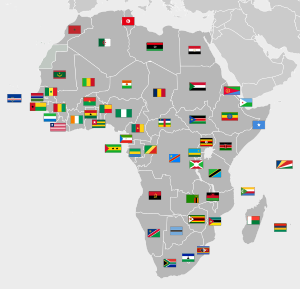

In [72]:
# map
# map of Africa flags from Wikipedia
map_img_overlay = folium.Map([2,22], zoom_start=3, tiles='CartoDB Positron')

# image to overlay on map
img_overlay = folium.raster_layers.ImageOverlay(name='flags of Africa', 
                                                image='flag_of_africa.png',
                                                # bounds - [[lat_min, lon_min], [lat_max, lon_max]]
                                                bounds=[[-38, -28], [40, 60]],
                                                opacity=0.5,
                                                # controls layer order
                                                zindex=1)
# add image to map
img_overlay.add_to(map_img_overlay)

# layer control to click layer on or off
folium.LayerControl().add_to(map_img_overlay)

# display map
map_img_overlay

# Maps interactive 

In [77]:
# using ipywidgets
# plot location with marker

import geocoder
import ipywidgets

# text widget
address_text_box = ipywidgets.Text(value='', placeholder='type here', description='address:')

# widget function
def plot_locations(address):
    # location address
    location = geocoder.osm(address)
    
    # latitude and longitude of location
    latlng = [location.lat, location.lng]
    
    # create map
    plot_locations_map = folium.Map(location=[40, -100], zoom_start=4)
    
    # marker
    folium.Marker(latlng, popup=str(address), tooltip='click').add_to(plot_locations_map)
    
    # display map
    display(plot_locations_map)
    
# interaction between widget and function    
ipywidgets.interact_manual(plot_locations, address=address_text_box)

'''
test addresses
4790 W 16th St, Indianapolis, IN 46222 (Indy 500 Track)
2920 Zoo Dr, San Diego, CA 92101 (San Diego Zoo)
1 Infinite Loop, Cupertino, CA 95014 (Apple)
'''

interactive(children=(Text(value='', description='address:', placeholder='type here'), Button(description='Run…

'\ntest addresses\n4790 W 16th St, Indianapolis, IN 46222 (Indy 500 Track)\n2920 Zoo Dr, San Diego, CA 92101 (San Diego Zoo)\n1 Infinite Loop, Cupertino, CA 95014 (Apple)\n'

In [78]:
# using ipywidgets
# plot route with distance measure
# import geopy & geocoder
# can probably use geopy to geocode also
# if geopy.distance.distance does not work try import geopy.distance

import geopy.distance

# text widgets
route_start_widget = ipywidgets.Text(value='', placeholder='address', description='start:')
route_stop_widget = ipywidgets.Text(value='', placeholder='address', description='stop:')

# widget function
def get_distance(start_address, stop_address):
    
    # string addresses to location information
    start_location = geocoder.osm(start_address)
    stop_location = geocoder.osm(stop_address)
    
    # pull out latitude and longitude from location information
    start_latlng = [start_location.lat, start_location.lng]
    stop_latlng = [stop_location.lat, stop_location.lng]
    
    # calculate distance from start point to stop point using latitudes and longitudes
    distance = geopy.distance.distance(start_latlng, stop_latlng).miles
    print(f'distance: {distance:.2f} miles')
    
    # map
    distance_path = [(start_latlng), (stop_latlng)]
    map_distance = folium.Map(location=[38, -98], zoom_start=4)
    plugins.AntPath(distance_path).add_to(map_distance)
    display(map_distance)
    
# interaction between widgets and function    
ipywidgets.interact_manual(get_distance, start_address=route_start_widget, stop_address=route_stop_widget)

# notice animation moves in the direction from start to stop and distance prints above map

interactive(children=(Text(value='', description='start:', placeholder='address'), Text(value='', description=…

<function __main__.get_distance(start_address, stop_address)>